# Creating a Linear Regression Model using PyTorch





In [1]:
# Getting our dependencies

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating a Linear Regression using numpy


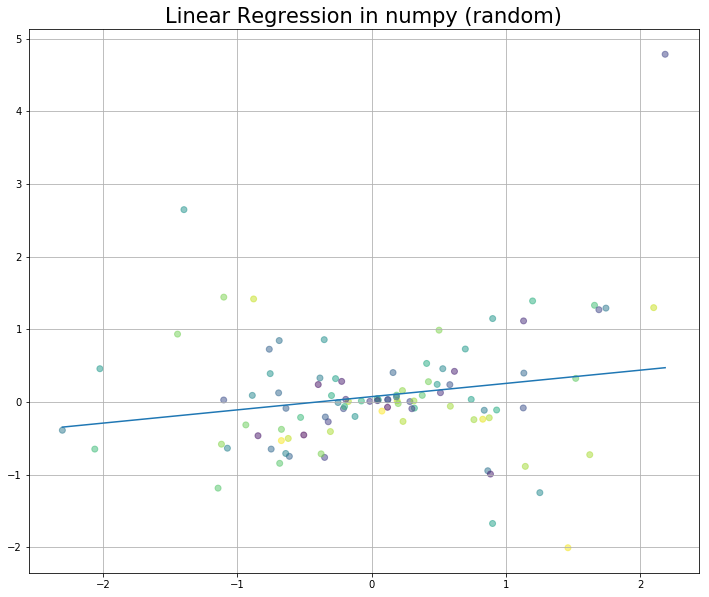

In [19]:

np.random.seed(1)

# choosing up to 100 numbers
n = 100

# deifining our equation
x = np.random.randn(n)
y = x * np.random.randn(n)

# plotting our equation

plt.figure(figsize=(12,10))
plt.grid(True)
colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.scatter(x, y, c=colors, alpha=0.5)

plt.title('Linear Regression in Numpy (random)', fontsize='21')
print('')
plt.show();

Here is a  ```y = mx + b``` equation where if you change **x** it will affect **y**.
**x** is the independent variable if we change **x**,  **y** also has to changes since **y** depends on **x**.

The purpose of linear regression is to:

   - minimize the distance between the points and the line (y = ax + b) as to get them
    closer and closer to the line.
    
To best fits those points we need to adjust two values:
 
    - coefficients: alpha 
    - Bias/intercepts: Beta
     
For example, if we move beta to a smaller value our line uphere will move downwards.
And, hence the contrary if we move the value of beta up.   Therefore, beta always aims to go towards the middle of the points.

## Creating a Linear Regression using PyTorch

>  Creating the data

In [3]:
# using list comprehensions

x = [i for i in range(11)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
# convert the list to numpy arrays
# since is what torch expects 

x_train = np.array(x, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# reshaping it into a 2d array 

x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
# creating the equation y = 2x + 1

# creating the list iterator

y = [2*i + 1 for i in x]
print(y)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]




> Alternatively:

creating the equation y = 2x + 1

```{python}
y = []
for in in x:
    result = 2*i + 1
    y.append(result)
```


In [7]:
# convert the list to numpy arrays
# since is what torch expects 

y_train = np.array(y, dtype=np.float32)
y_train.shape

(11,)

### Building the Model

In [8]:
# Getting our dependencies
import torch 

# for linear regression
import torch.nn as nn

# for creating variables
from torch.autograd import Variable


In [9]:
# learning rate: how fast the model will learn
learning_rate = 0.01

# instantiating model class
input_dim = 1
output_dim = 1

# creating a class


class Linear(nn.Module):
    '''This class will allow us to create a linear regression model.'''
    def __init__(self, input_dim, output_dim):
        # "super" function inherits everything from nn.Module
        super(Linear, self).__init__()
        # y = 2x + 1, input = x; output = y
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
# creting the model

model = Linear(input_dim, output_dim)

In [10]:
# instantiate a loss class
# Using the MSE Loss: mean squared error
# MSE = 1/n sum (y_hat - yi)  where y_hat is prediction and y is true value or
# MSE = predicted values - labels and then we do a mean accross them

criterion = nn.MSELoss()


In [11]:
# optimizer 

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

> ### Trainning The Model

In [12]:

# defining how many times we are going through entere x_train dataset
epochs = 100

for epoch in range(epochs):
    epoch += 1
    # convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients for parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients with respect to parameters
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # print number of epochs and loss 
    print('epoch {}, ----------------->, loss {}'.format(epoch, loss.data[0]))
    


epoch 1, ----------------->, loss 218.92617797851562
epoch 2, ----------------->, loss 17.88426399230957
epoch 3, ----------------->, loss 1.4856066703796387
epoch 4, ----------------->, loss 0.1477212905883789
epoch 5, ----------------->, loss 0.03829748183488846
epoch 6, ----------------->, loss 0.029079092666506767
epoch 7, ----------------->, loss 0.028037315234541893
epoch 8, ----------------->, loss 0.027665741741657257
epoch 9, ----------------->, loss 0.027352040633559227
epoch 10, ----------------->, loss 0.027046233415603638
epoch 11, ----------------->, loss 0.026744170114398003
epoch 12, ----------------->, loss 0.026445500552654266
epoch 13, ----------------->, loss 0.026150215417146683
epoch 14, ----------------->, loss 0.025858212262392044
epoch 15, ----------------->, loss 0.025569390505552292
epoch 16, ----------------->, loss 0.025283921509981155
epoch 17, ----------------->, loss 0.025001557543873787
epoch 18, ----------------->, loss 0.02472233586013317
epoch 19, --

> Comparing the DATA

In [13]:
pred = model(Variable(torch.from_numpy(x_train))).data.numpy()
print(pred)

[[  1.18456459]
 [  3.15798569]
 [  5.13140678]
 [  7.1048274 ]
 [  9.07824898]
 [ 11.05166912]
 [ 13.02509022]
 [ 14.99851131]
 [ 16.97193146]
 [ 18.94535255]
 [ 20.91877365]]


In [14]:
print(y_train)

[  1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.]


#### Plotting the graph



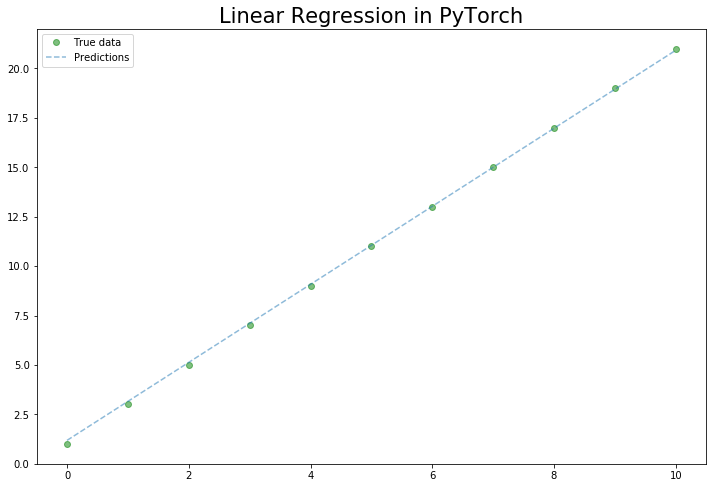

In [17]:

plt.figure(figsize=(12,8))
# Clear figure
plt.clf()

# Get predictions
pred = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot predictions
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, pred, '--', label='Predictions', alpha=0.5)


plt.title("Linear Regression in PyTorch", fontsize='21')
# Legend and plot
plt.legend(loc='best')
plt.show();

The line is modeling the data very well. The true data are the dots and the predicitions 
is the straight line. The error has been minimized because the predictions fit the true data
as best as it can.